In [7]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [11]:
def myfcn_bayerMatrixGeneratorVanilla(img):
    sz = img.shape  # Measure the size of the image
    bayer = np.zeros((sz[0], sz[1]), dtype=np.uint8)
    
    for rows in range(sz[0]):
        for cols in range(sz[1]):
            if len(sz) == 2:  # Grayscale image
                bayer[rows, cols] = img[rows, cols]
            elif (rows % 2 == 0) and (cols % 2 == 0):
                bayer[rows, cols] = img[rows, cols, 0]
            elif (rows % 2 == 1) and (cols % 2 == 1):
                bayer[rows, cols] = img[rows, cols, 2]
            else:
                bayer[rows, cols] = img[rows, cols, 1]
    
    return bayer

In [12]:
def myfcn_deBayerImageGeneratorVanilla(bayer1):
    sz = bayer1.shape  # Measure the size of the image
    bayer = np.zeros((sz[0] + 2, sz[1] + 2), dtype=np.uint8)  # Padding of zeros
    bayer[1:sz[0] + 1, 1:sz[1] + 1] = bayer1
    image = np.zeros((sz[0], sz[1], 3), dtype=np.uint8)
    
    for rows in range(1, sz[0] + 1):
        for cols in range(1, sz[1] + 1):
            if (rows % 2 == 1) and (cols % 2 == 1):
                image[rows - 1, cols - 1, 0] = bayer[rows, cols]
                image[rows - 1, cols - 1, 1] = (
                    bayer[rows - 1, cols] + bayer[rows + 1, cols] +
                    bayer[rows, cols - 1] + bayer[rows, cols + 1]
                ) // 4
                image[rows - 1, cols - 1, 2] = (
                    bayer[rows - 1, cols - 1] + bayer[rows - 1, cols + 1] +
                    bayer[rows + 1, cols - 1] + bayer[rows + 1, cols + 1]
                ) // 4
            elif (rows % 2 == 0) and (cols % 2 == 0):
                image[rows - 1, cols - 1, 0] = (
                    bayer[rows - 1, cols - 1] + bayer[rows - 1, cols + 1] +
                    bayer[rows + 1, cols - 1] + bayer[rows + 1, cols + 1]
                ) // 4
                image[rows - 1, cols - 1, 1] = (
                    bayer[rows - 1, cols] + bayer[rows + 1, cols] +
                    bayer[rows, cols - 1] + bayer[rows, cols + 1]
                ) // 4
                image[rows - 1, cols - 1, 2] = bayer[rows, cols]
            elif (rows % 2 == 0) and (cols % 2 == 1):
                image[rows - 1, cols - 1, 0] = (
                    bayer[rows - 1, cols] + bayer[rows + 1, cols]
                ) // 2
                image[rows - 1, cols - 1, 1] = bayer[rows, cols]
                image[rows - 1, cols - 1, 2] = (
                    bayer[rows, cols - 1] + bayer[rows, cols + 1]
                ) // 2
            else:
                image[rows - 1, cols - 1, 0] = (
                    bayer[rows, cols - 1] + bayer[rows, cols + 1]
                ) // 2
                image[rows - 1, cols - 1, 1] = bayer[rows, cols]
                image[rows - 1, cols - 1, 2] = (
                    bayer[rows - 1, cols] + bayer[rows + 1, cols]
                ) // 2
    
    return image


C:\Users\bashe\AppData\Local\Temp\ipykernel_19524\247536874.py:16: RuntimeWarning: overflow encountered in ubyte_scalars
  bayer[rows - 1, cols - 1] + bayer[rows - 1, cols + 1] +
C:\Users\bashe\AppData\Local\Temp\ipykernel_19524\247536874.py:25: RuntimeWarning: overflow encountered in ubyte_scalars
  bayer[rows - 1, cols] + bayer[rows + 1, cols] +
C:\Users\bashe\AppData\Local\Temp\ipykernel_19524\247536874.py:35: RuntimeWarning: overflow encountered in ubyte_scalars
  bayer[rows, cols - 1] + bayer[rows, cols + 1]
C:\Users\bashe\AppData\Local\Temp\ipykernel_19524\247536874.py:43: RuntimeWarning: overflow encountered in ubyte_scalars
  bayer[rows - 1, cols] + bayer[rows + 1, cols]
C:\Users\bashe\AppData\Local\Temp\ipykernel_19524\247536874.py:12: RuntimeWarning: overflow encountered in ubyte_scalars
  bayer[rows - 1, cols] + bayer[rows + 1, cols] +
C:\Users\bashe\AppData\Local\Temp\ipykernel_19524\247536874.py:21: RuntimeWarning: overflow encountered in ubyte_scalars
  bayer[rows - 1, co

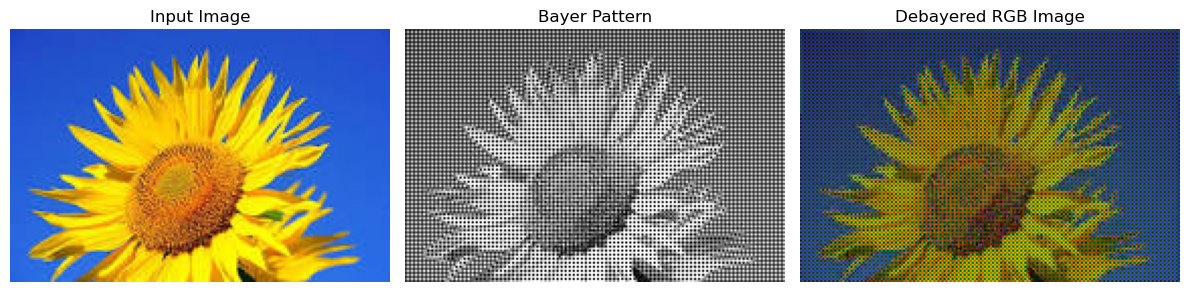

In [13]:
# Load the input image
input_image_path = "Sunflower.jpg"
input_image = Image.open(input_image_path)

# Convert the input image to a NumPy array
input_image_data = np.array(input_image)

# Generate Bayer pattern from the input image
bayer_pattern = myfcn_bayerMatrixGeneratorVanilla(input_image_data)

# Perform debayering to get RGB color image
rgb_image = myfcn_deBayerImageGeneratorVanilla(bayer_pattern)

# Plot images
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(input_image_data)
plt.title("Input Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(bayer_pattern, cmap='gray')
plt.title("Bayer Pattern")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(rgb_image)
plt.title("Debayered RGB Image")
plt.axis('off')

plt.tight_layout()
plt.show()